# Predicitng Zoom Stock Price 

In this Data Science Project we will create a Linear Regression model and a Decision Tree Regression Model to Predict Zoom's Stock Price using Machine Learning and Python.

In [1]:
import pandas as pd
zoom = pd.read_csv(r"C:\Users\cheml\Documents\Skul\Zoom Stock Price Prediction\ZM.csv")
zoom.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-18,70.470001,71.139999,68.779999,70.080002,70.080002,1676000
1,2019-11-19,70.190002,70.332001,68.190002,69.639999,69.639999,1704700
2,2019-11-20,69.250000,71.709999,68.550003,70.989998,70.989998,2780700
3,2019-11-21,71.500000,71.949997,69.580002,69.919998,69.919998,1127000
4,2019-11-22,72.000000,74.000000,71.150002,73.160004,73.160004,3051900


In [2]:
zoom.shape

(251, 7)

## Visualization of Close Price data

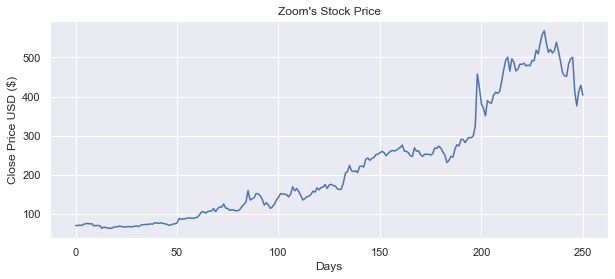

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Zoom's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(zoom["Close"])
plt.show()

In [6]:
# Close Price

zoom = zoom[["Close"]]
print(zoom.head())

       Close
0  70.080002
1  69.639999
2  70.989998
3  69.919998
4  73.160004


In [8]:
# Creating a variable to predict ‘X’ days in the future:

futureDays = 25

# Create a new target column shifted ‘X’ units/days up:

zoom["Prediction"] = zoom[["Close"]].shift(-futureDays)
print(zoom.head())
print(zoom.tail())

       Close  Prediction
0  70.080002   66.459999
1  69.639999   67.449997
2  70.989998   66.639999
3  69.919998   66.790001
4  73.160004   68.040001
          Close  Prediction
246  413.239990         NaN
247  376.010010         NaN
248  413.339996         NaN
249  428.640015         NaN
250  403.579987         NaN


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
# To create a feature dataset (x) and convert into a numpy array and remove last ‘x’ rows/days:

import numpy as np
x = np.array(zoom.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[ 70.080002]
 [ 69.639999]
 [ 70.989998]
 [ 69.919998]
 [ 73.160004]
 [ 74.550003]
 [ 75.160004]
 [ 74.080002]
 [ 74.5     ]
 [ 68.93    ]
 [ 70.019997]
 [ 69.959999]
 [ 69.669998]
 [ 62.740002]
 [ 65.940002]
 [ 64.57    ]
 [ 63.52    ]
 [ 62.490002]
 [ 63.540001]
 [ 66.349998]
 [ 66.169998]
 [ 67.599998]
 [ 68.18    ]
 [ 66.93    ]
 [ 66.150002]
 [ 66.459999]
 [ 67.449997]
 [ 66.639999]
 [ 66.790001]
 [ 68.040001]
 [ 68.720001]
 [ 67.279999]
 [ 70.32    ]
 [ 71.900002]
 [ 72.550003]
 [ 72.620003]
 [ 73.089996]
 [ 74.029999]
 [ 73.160004]
 [ 76.940002]
 [ 76.110001]
 [ 75.559998]
 [ 76.730003]
 [ 75.540001]
 [ 74.470001]
 [ 73.      ]
 [ 70.440002]
 [ 71.510002]
 [ 73.580002]
 [ 74.540001]
 [ 76.300003]
 [ 87.660004]
 [ 85.790001]
 [ 86.989998]
 [ 87.260002]
 [ 88.639999]
 [ 89.669998]
 [ 88.68    ]
 [ 88.279999]
 [ 89.860001]
 [ 90.949997]
 [ 96.389999]
 [103.93    ]
 [105.290001]
 [101.760002]
 [105.010002]
 [107.080002]
 [106.879997]
 [113.550003]
 [105.      ]
 [113.110001]
 [117.

In [10]:
# To create a target dataset (y) and convert it to a numpy array and get all of the target values except the last ‘x’ rows days:

y = np.array(zoom["Prediction"])[:-futureDays]
print(y)

[ 66.459999  67.449997  66.639999  66.790001  68.040001  68.720001
  67.279999  70.32      71.900002  72.550003  72.620003  73.089996
  74.029999  73.160004  76.940002  76.110001  75.559998  76.730003
  75.540001  74.470001  73.        70.440002  71.510002  73.580002
  74.540001  76.300003  87.660004  85.790001  86.989998  87.260002
  88.639999  89.669998  88.68      88.279999  89.860001  90.949997
  96.389999 103.93     105.290001 101.760002 105.010002 107.080002
 106.879997 113.550003 105.       113.110001 117.470001 116.800003
 125.       114.32     113.75     108.489998 110.300003 109.470001
 107.470001 107.860001 111.099998 118.709999 123.769997 130.550003
 159.559998 135.179993 138.110001 141.149994 151.699997 150.880005
 146.119995 137.       121.93     128.199997 122.940002 113.75
 117.809998 124.510002 135.919998 141.889999 151.559998 150.259995
 150.059998 148.990005 143.270004 150.25     169.089996 158.800003
 164.600006 156.720001 146.479996 135.169998 138.559998 143.440002

# Split the data into 75% training and 25% testing

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

## Creating Models

In [12]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

In [15]:
# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [16]:
# To get the last ‘x’ rows/days of the feature dataset:

xfuture = zoom.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[369.890015]
 [350.880005]
 [389.649994]
 [384.480011]
 [383.      ]
 [403.51001 ]
 [410.940002]
 [408.170013]
 [413.125   ]
 [438.730011]
 [468.470001]
 [492.600006]
 [500.529999]
 [464.980011]
 [496.5     ]
 [487.660004]
 [465.5     ]
 [470.109985]
 [482.98999 ]
 [482.230011]
 [485.369995]
 [478.25    ]
 [480.609985]
 [478.549988]
 [492.410004]]


## Model Tree Prediction

In [17]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [491.540009 518.789978 509.25     536.400024 559.       537.02002
 537.02002  537.02002  520.539978 478.549988 517.789978 403.579987
 516.01001  489.679993 460.910004 413.23999  451.51001  483.700012
 496.730011 500.109985 413.23999  428.640015 500.109985 428.640015
 403.579987]


## Linear Tree Predicition

In [18]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [438.48896742 417.23041422 460.58619751 454.80469825 453.14962849
 476.08560479 484.39443158 481.29680256 486.83787565 515.47150018
 548.72919756 575.71334933 584.58131827 544.82640434 580.07464267
 570.1890337  545.40789871 550.56316225 564.96664081 564.11676993
 567.62815772 559.66599502 562.30512391 560.00146622 575.50087351]


## Visualize Decision Tree Prediction

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


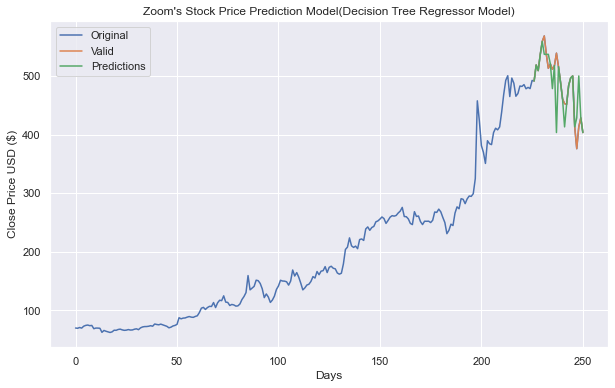

In [21]:
predictions = treePrediction
valid = zoom[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Zoom's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(zoom["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

## Visualize the Linear Model Predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


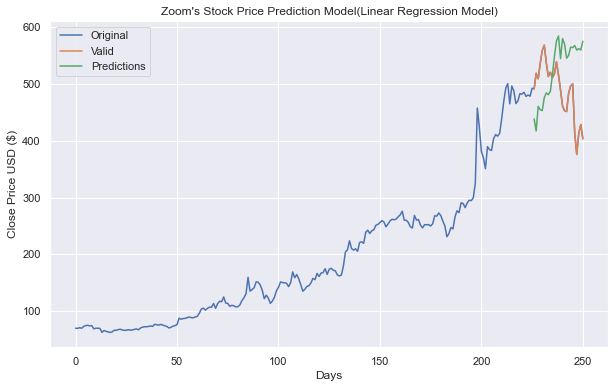

In [22]:
predictions = linearPrediction
valid = zoom[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Zoom's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(zoom["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()